**
 GRADIENTE DESCENDIENTE **

<div class="alert alert-block alert-danger">

Gradiente Descendiente

Realicé una implementación en python del algoritmo de gradiente descendiente. Esta implementación debe solucionar el problema de regresión que se trabajo en clase (archivo de excel). Se debe tener en cuenta lo siguiente:

1. Debe realizar la implementación en un notebook de jupyter.
2. La implementación debe ser interactiva. Es decir yo deberia poder modificar la taza de aprendizaje por medio de un elemento de interacción, para esto estudie la libreria _ipywidgets_.
3. Se debe hacer una gráfica de la función de costo a medida que se actualizan los parámetros, de tal forma que se pueda observar como cambia la función de costo, cuando se utiliza diferentes tasas de aprendizaje.
4. Realice la implementación para que funcione para regresión multivariable.

Esta tarea de be entregarse de forma individual antes del Domingo 27 de Agosto del 2023 a las 11:59 p.m.

</div>

<div class="alert alert-block alert-warning">

Desarrolle el programa de forma funcional. Es decir, cree funciones pequeñas que realicen cosas especificas. Para este programa deben realizar los siguientes programas:

1. Uno que reciba de entrada los parámetros $\boldsymbol\theta$ y la matriz de entrada $\mathbf{A}$, y calcule como salida $\mathbf{h}_{\boldsymbol\theta}$
2. Un programa que reciba como entrada los parámetros $\boldsymbol\theta$, la salida del modelo $\mathbf{h}_{\boldsymbol\theta}$ y la salida esperada $\mathbf{y}$, y produzca como salida el valor de la función de costo $J$.
3. Un porgrama que calcule la derivada de la funcióm de costo, recibe como entrada los parámetros $\boldsymbol\theta$, la salida del modelo $\mathbf{h}_{\boldsymbol\theta}$ y la salida esperada $\mathbf{y}$, y produce como salida el gradiente $\nabla_{\boldsymbol\theta}J=\left[\frac{\partial J}{\partial_{\theta_0}} \quad \frac{\partial J}{\partial_{\theta_0}} \quad \ldots \quad \frac{\partial J}{\partial_{\theta_n}}\right]^{\text{T}}$.
4. Un programa que realice la actualización de los datos, recibe como entraba $\boldsymbol\theta[j]$, la tasa de aprendizaje $\eta$, la matriz de entrada $\mathbf{A}$ la salida del modelo $\mathbf{h}_{\boldsymbol\theta}$ y la salida esperada $\mathbf{y}$, y produzca como salida los parámetros actualizados $\boldsymbol\theta[j+1]$.

</div>

In [ ]:
#LIBRARY STATEMENT
import numpy as np #for mathematical operations
import pandas as pd #For data manipulation
import matplotlib.pyplot as plt #Plotting as MATLAB style
import ipywidgets as widgets #allow sliders and other widgets
import array
import random

from mpl_toolkits.mplot3d import Axes3D

#Program development methodology:
  #1. Import libraries and read de database.




  #IMPORTING DATA AND READING EXCEL FILE.
data = pd.read_excel('Real estate valuation data set.xlsx') #Function pd.read_excel() reads excel files with name in '', and assign the information in variable: "data".
data.shape #Function of variable.shape will answer (rows, columns) of the data set.

  #--> data.head(# rows) will show the read information of the excel, in this case we want to vissualize the information and understand which variables are relevant.
data.head(10)




,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


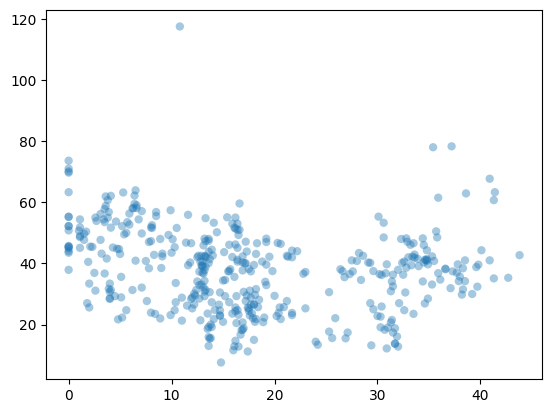

In [ ]:
# Graph of the variables involved.
plt.scatter(data['X2 house age'], data['Y house price of unit area'],alpha=0.4,edgecolor='none')

414
theta parameter: [42.43469705 -0.25148842]
h_theta: h_theta


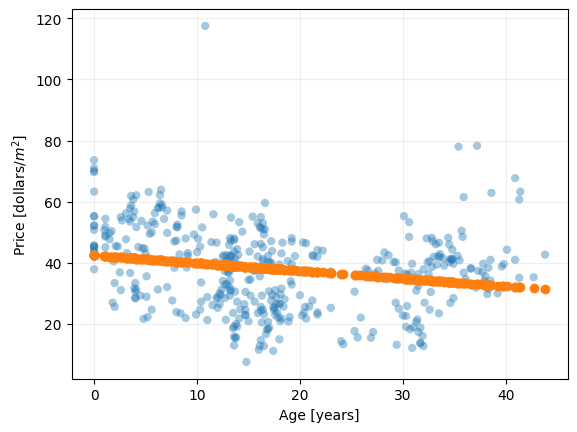

In [ ]:
#LINEAR REGRESSION(LR)
# A LR is needed as we need to associate some input variables to obtain a desired output, in this case, according to the house age we expect an output
#of house price; LR style: y = mx + b. In the present context the output 'y' should be the house price, while the 'x' variable the house age. 'm' and
#'b' are parameters that will moldulate the regression behavor, the goal is to obtain the parameters that best adequate to the behavior of the data
#plotted and whos value is minimun. We will define 'm' and 'b' as parameters to be found denominated 'theta'. In that manner we can describe in matrixes:

# h_thetha  = [ theta0(b)  theta1(m) ] * [1   x]
# h_theta will be the function we will try to modelate the output 'y' behaviour.
# theta = [ theta0(b)  theta1(m) ]
# A = [1   x]
# htheta = A*theta

#First step should be find the theta unknown parameters. If y = A*theta we solve for theta.
# Multiply by the transposed to ensure an invertible matrix.
# A^T*A*theta = y * A^T
# AS they are matrixes, we multiply by the psuedo inverse to "divide" by A^T*A.
#   I * theta = y * A^T * (A_T * A)^+

#--Extra Notes:--
#np.matmul( input1, input2, output). Matrix multiplication
#np.linalg.pinv(). pseudo inverse function


#Create ones vector.
ones = np.ones((len(data),1))#length of data but one column
#print(ones)
x = data['X2 house age']#assign variable x the values of column house age
y = data['Y house price of unit area']#assign variable y data of house price.
A = np.column_stack((ones, x)) #Function to stack vector in a matrix.
#If we eant to increae the order of the aproximation we just add more variables, example:
# A = np.column_stack((ones, x, x**2))
#print("Matrix A:",A)
m = len(y) #constant that will have assigned the size of the number of data.
print(len(data))

def theta_calculation_method1(matrix1, modelExpectedOutput):#Method 1 for making multiplications of matrixes
  theta = np.matmul( np.matmul( np.linalg.pinv(np.matmul(np.transpose(matrix1),matrix1)) , np.transpose(matrix1) )  ,  modelExpectedOutput )
  return theta

def theta_calculation_method2(matrix1, outputVariable):#method number two for matrix multiplications
  theta = np.linalg.pinv(A.T@A)@A.T@y
  return theta

def h_calculation_method(matrixA, theta):#(A, theta)
  h = matrixA@theta
  return h

theta = theta_calculation_method2(A, y)#We calculate the parameters theta from the solved equation.
print("theta parameter:", theta)

h_theta = h_calculation_method(A, theta)#The aproximation solution will be the parameters times matrix A.
print("h_theta: h_theta")

# Graph of the linear regression result
plt.scatter(data['X2 house age'], data['Y house price of unit area'],alpha=0.4,edgecolor='none')
plt.xlabel('Age [years]')
plt.ylabel('Price [dollars/$m^2$]')
plt.scatter(x,h_theta)#plotting LR.
plt.grid(visible=True,alpha=0.2)


A continuación se expresan las ecuaciones a tomar en cuenta para el calculo de la función de costo, y posteriormente su derivada.

$$ \begin{equation}
   \begin{split}
        & \quad J(\boldsymbol{\theta}) = \frac{1}{m}\sum_{i=1}^{m}\left[h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)}\right]^2,\\
            & \quad e = \ y - \ h_{0}(x),\\
            &\sum_{i=1}^{m}\left[(x^{(i)})*y^{(i)}\right]^2 = x^{T}* x,\\
            & J = \frac{1}{m} * e^{T} *e
   \end{split}
   \end{equation}$$

The derivate of the cost function towars parameter theta0 and theta 1 is expressed as follows:
$$ \begin{equation}
   \begin{split}
        & \quad J(\boldsymbol{\theta}) = \frac{-1}{m}* A^{T}*error
   \end{split}
   \end{equation}$$

(2,)


interactive(children=(FloatSlider(value=0.499900008, description='learningRate', max=1.0, min=8e-09, step=0.00…

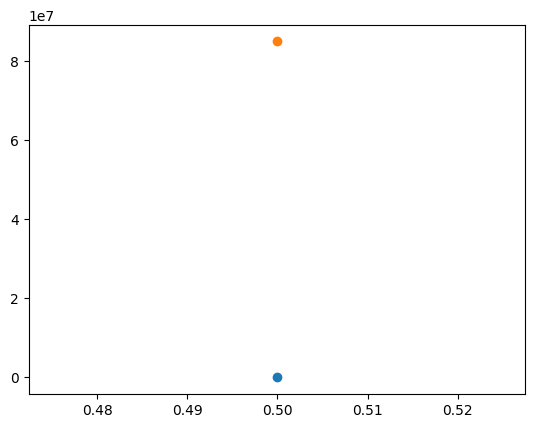

In [ ]:

auxA = theta.shape
print(auxA)


#The way in which we can optimize the linear regression for finding the best fit of modelling x and y is with it's cost function 'J' that indicates
# how big is the error of the prediction. A usefull technique to minimze this error is gradient descent to find the minimum parameters that minimize
# 'J' for the parameters founded.
#We calculate the cost function taking into account definition.
costFunctionArray = array.array('f', [0]*m )
thetaArray = array.array('f', [0]*m )
learningRate = 0.00000000000001
theta = np.random.randn(1,2)#we randomize theta values with the characteristic of a gaussian distribution.

def CostFunctionCalculation(modelAproximationOutput, modelExpectedOutput):
  error = modelExpectedOutput - ( modelAproximationOutput)
  J =  (error.T @ error)/m #cost function calculated
  return J

def derivateCalculation( A, modelAproximationOutput,  modelExpectedOutput ):
  error = (modelExpectedOutput - modelAproximationOutput)
  JDerivate = -(A.T @ error)/m
  return JDerivate

#After we found the derivative we have to update the theta parameters and compare i the new cost function si better or worse.
def updateThetaGradientDescent(Theta_j, modelAproximationOutput, modelExpectedOutput, modelLearningRate, costFunctionDerivate):
  Theta_j1 = Theta_j - ( modelLearningRate * costFunctionDerivate)
  return Theta_j1
#distribucion gaussiana media 0, y SD = 1 for theta initializing in random parametes.
def graph(learningRate):
 # Theta_latest = updateThetaGradientDescent(theta, h_theta, modelLearningRate, y)
  #print(Theta_latest)
  #new_h = h_calculation_method(A, Theta_latest)
  theta = np.random.randn(2,)#we randomize theta values with the characteristic of a gaussian distribution.
  #print(theta)
  h_theta = h_calculation_method(A, theta)

  iterations = 2
  auxTheta = theta
  for i in range(iterations):
    costFunction_J = CostFunctionCalculation(h_theta, y )
    #costFunctionArray[i] = costFunction_J
    print("-- ITERATION PACKAGE %d --" %(i) )
    print("Cost Function:", costFunction_J)
    derivate_of_J = derivateCalculation(A, h_theta, y)
    print("J Derivate result: ", derivate_of_J)
    Theta_latest = updateThetaGradientDescent(auxTheta, h_theta, y, learningRate, derivate_of_J)
    h_theta = h_calculation_method(A, Theta_latest)
    auxTheta = Theta_latest
    print("Latest Theta", Theta_latest)
    print("--- END ITERATION #%d --" %(i))
    print()
    print()
    plt.scatter(learningRate, costFunction_J)
    #plt.hold(True)
    #plt.grid(visible=True,alpha=0.2)
    #The following function creates the widget with min, max, ans steps.
widgets.interact(graph, learningRate=(0.000000008, 1, 0.0001));

#def derivate2(theta, h, y):
#  m = len(y)
 # J = lambda theta: CostFunctionCalculation(h, theta, y)
 # dtheta = np.gradient(J, theta)
 # res = np.column_stack(dtheta0, dtheta1)
 # return res
#JD2 = derivate2(theta, h_theta, y)

Matrix A multi Variable:  [[  1.       32.       84.87882]
 [  1.       19.5     306.5947 ]
 [  1.       13.3     561.9845 ]
 ...
 [  1.       18.8     390.9696 ]
 [  1.        8.1     104.8101 ]
 [  1.        6.5      90.45606]]
theta MV:  [ 4.98855858e+01 -2.31026583e-01 -7.20862014e-03]
Cost Function MV:  93.97976963938092


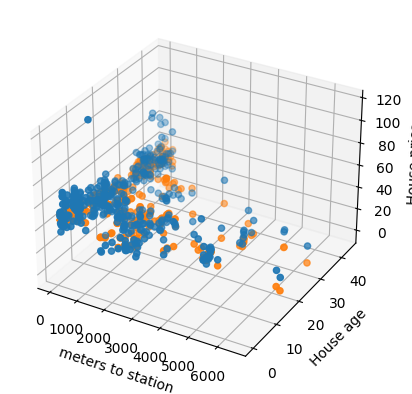

In [ ]:
#MULTIVARIABLE APPROACH
var2 = data['X3 distance to the nearest MRT station']
inputVariables = np.column_stack((x,var2))#Vector for input data.
matrixMultiVariables = np.column_stack((ones, inputVariables))#Equivalent of matrix A in past exercise.
print("Matrix A multi Variable: ", matrixMultiVariables)
thetaMultiVariable = np.linalg.pinv(matrixMultiVariables.T @ matrixMultiVariables) @ matrixMultiVariables.T @ y
print("theta MV: ", thetaMultiVariable)
#aux1 = matrixMultiVariables.shape
#print("shape:",aux1)
#MV stand for Multi-Variable
modelAprox_multiVariables = np.matmul( matrixMultiVariables, thetaMultiVariable)#multivariable h function
CostFunctionMV_Calc = CostFunctionCalculation(modelAprox_multiVariables, y)#We use past function to calculate cost function.
print("Cost Function MV: ",CostFunctionMV_Calc)#print cost function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(var2, x, y)
ax.set_xlabel('meters to station')
ax.set_ylabel('House age ')
ax.set_zlabel('House price ')

ax.scatter(matrixMultiVariables[:, 2], matrixMultiVariables[:, 1], modelAprox_multiVariables)
plt.grid(visible=True,alpha=0.2)



In [ ]:
#The rest of the process is the same as one variable linear regression. We initialize theta values, find cost function, find the derivative, and update it's values.
aux_A = thetaMultiVariable.shape
AuxB = matrixMultiVariables.shape
auxc = y.shape
print("A: %f und B: %f",aux_A, AuxB, auxc)
thetaMultiVariable = np.random.randn(3,)#we randomize theta values with the characteristic of a gaussian distribution.

def graph2(learningRate):
 # Theta_latest = updateThetaGradientDescent(theta, h_theta, modelLearningRate, y)
  #print(Theta_latest)
  #new_h = h_calculation_method(A, Theta_latest)
  #matrixMultiVariables = [random.uniform(1, 100), random.uniform(1, 100), random.uniform(1, 100) ]#randomize the0, theta1, theta 2
  modelAprox_multiVariables = h_calculation_method(matrixMultiVariables, thetaMultiVariable)#Equivalent to h_theta
  auxd = modelAprox_multiVariables.shape
  iterations = 2#FOR interations
  auxTheta = thetaMultiVariable#auxiliar variable that carries the
  for i in range(iterations):
    costFunction_J = CostFunctionCalculation(modelAprox_multiVariables, y )
    #costFunctionArray[i] = costFunction_J
    print("-- ITERATION PACKAGE %d --" %(i) )
    print("Cost Function:", costFunction_J)
    derivate_of_J = derivateCalculation(np.array(matrixMultiVariables), modelAprox_multiVariables, y)
    print("J Derivate result: ", derivate_of_J)
    Theta_latest = updateThetaGradientDescent(auxTheta, modelAprox_multiVariables, y, learningRate, derivate_of_J)
    modelAprox_multiVariables = h_calculation_method(matrixMultiVariables, Theta_latest)
    auxTheta = Theta_latest
    print("Latest Theta", Theta_latest)
    print("--- END ITERATION #%d --" %(i))
    print()
    print()
    plt.scatter(learningRate, costFunction_J)


  #The following function creates the widget with min, max, ans steps.
widgets.interact(graph2, learningRate=(0.000000008, 1, 0.0001));


"""
CONCLUSIONS:

  1)Linear Regresion, gradient descent, and cost fucntion algorythm calculations have been successfully applied developed.
  2)Widget  slider couldn't be adapted into one single picture that allow a single graph with update, perhaps, having the
  past graphs can represent an advantage when analyzing results and comparing easily cost function upon a learning rate.
  3) Model convergence is very challenging in the sense that there are many variables to account into, as theta initialize
  value and learning rate, which leads to a high difficulty when finding the minimum cost function which best adapts to the
  model, when a combination of theta values and a relatively acceptable cost function is founded, the method will incurr in
  making continious iterations until a cost function magnitude is acceptable. This iterations can be very expensive due to
  the long amout of time needed to decrease cost function when the decreasing derivative have very small values.
  4) Multiple line comments are done with three quotation marks together. :)

"""


NameError: name 'thetaMultiVariable' is not defined